http://www.scholarpedia.org/article/Duffing_oscillator

In [2]:
using ReachabilityAnalysis, Plots

In [39]:
@taylorize function duffing!(du, u, p, t)
    local α = -1.0
    local β = 1.0
    local δ = 0.3
    local γ = 0.37

    x, v = u
    f = γ * cos(ω * t)

    du[1] = u[2]
    
    aux1 = -δ*v
    aux2 = -α*x
    aux3 = -β * x^3
    du[2] = (aux1 + aux2) + (aux3 + f)
end

ω = 1.2
T = 2*pi / ω
X0 = Singleton([1.0, 0.0]) ⊕ BallInf(zeros(2), 0.1)
prob = @ivp(x' = duffing!(x), x(0) ∈ X0, dim=2);

In [41]:
@time sol = solve(prob, tspan=(0.0, 20*T), alg=TMJets());
solz = overapproximate(sol, Zonotope);

  5.770225 seconds (64.85 M allocations: 4.910 GiB, 20.84% gc time)


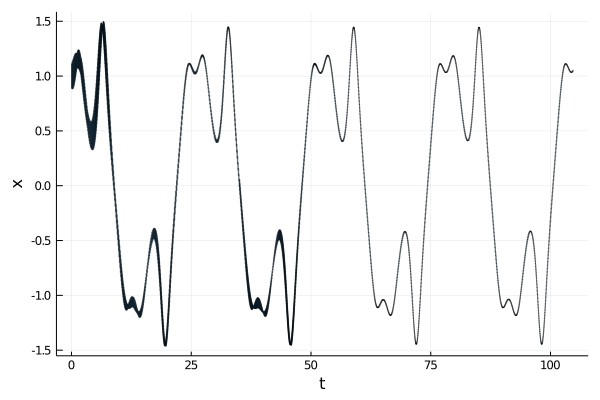

In [42]:
plot(solz, vars=(0, 1), xlab="t", ylab="x")

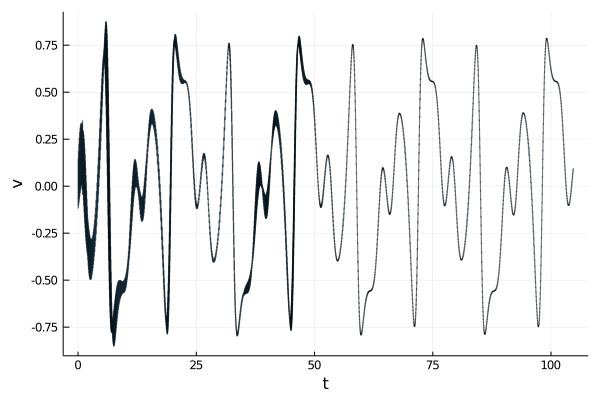

In [43]:
plot(solz, vars=(0, 2), xlab="t", ylab="v")